<a href="https://colab.research.google.com/github/furkanTekin0/CNN_siniflandirma/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adınız:FURKAN
Soyadınız: TEKİN
Okul Numaranız: 2112721055
GitHub Repo Bağlantısı: https://github.com/furkanTekin0/CNN_siniflandirma


Mounted at /content/drive
Found 84 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
Sınıf indeksleri: {'parfum': 0, 'yuzuk': 1}
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 9s/step - accuracy: 0.5242 - loss: 2.5491 - val_accuracy: 1.0000 - val_loss: 0.0603
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 822ms/step - accuracy: 0.9660 - loss: 0.1275 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 731ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 1.2895e-04
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 624ms/step - accuracy: 1.0000 - loss: 9.9285e-04 - val_accuracy: 1.0000 - val_loss: 1.7933e-05
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - accuracy: 1.0000 - loss: 3.2868e-04 - val_accuracy: 1.0000 - val_loss: 4.3974e-06
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.6696 - loss: 0.5589 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step - accuracy: 0.9725 - loss: 0.0946 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 1.

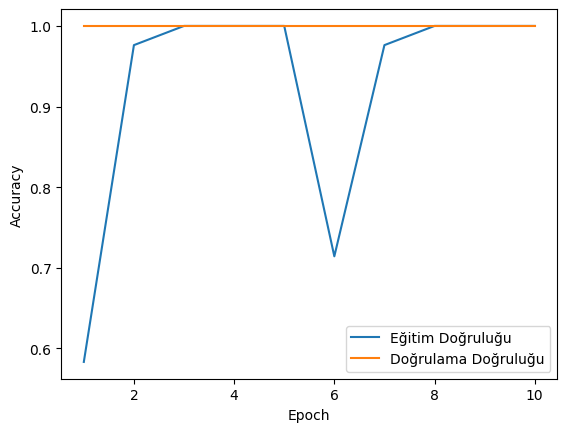

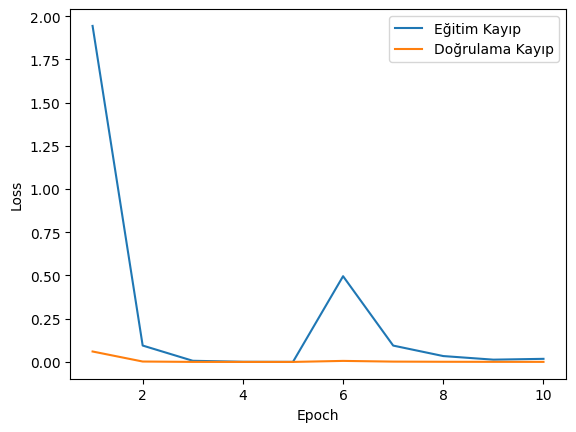

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 1.0000 - loss: 0.0128
Test doğruluğu (model1 - ResNet50): 1.0
Model kaydedildi: /content/drive/MyDrive/CNN_siniflandirma/model1_resnet50_saved.keras


In [ ]:
# ===================== MODEL1: Transfer Learning (ResNet50) =====================
from google.colab import drive
drive.mount('/content/drive')

import os, random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

# ---- Ayarlar ----
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

base_dir = "/content/drive/MyDrive/CNN_siniflandirma/dataset"  # <-- gerekirse değiştir
img_height, img_width = 128, 128
batch_size = 32

epochs_head = 10      # sadece üst katmanlar
epochs_ft   = 10      # fine-tuning
lr_head = 0.0005
lr_ft   = 0.00005

# ---- Dataset kontrol ----
assert os.path.isdir(base_dir), f"base_dir bulunamadı: {base_dir}"
train_dir = os.path.join(base_dir, "train")
val_dir   = os.path.join(base_dir, "val")
test_dir  = os.path.join(base_dir, "test")

# ---- Veri okuma (ResNet preprocess_input) ----
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen   = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode="categorical",
    shuffle=True, seed=SEED
)
val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode="categorical",
    shuffle=False
)
test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes
print("Sınıf indeksleri:", train_gen.class_indices)

# ---- Base model ----
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False  # önce dondur

inputs = layers.Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model = models.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_head),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
]

# ---- 1) Head training ----
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs_head,
    callbacks=callbacks
)

# ---- 2) Fine-tuning (son katmanları aç) ----
base_model.trainable = True
# ResNet büyük; tamamını açmak yerine son ~30 katmanı açalım:
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_ft),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs_ft,
    callbacks=callbacks
)

# ---- History birleştir ----
def merge_hist(h1, h2, key):
    return h1.history.get(key, []) + h2.history.get(key, [])

acc = merge_hist(history1, history2, "accuracy")
val_acc = merge_hist(history1, history2, "val_accuracy")
loss = merge_hist(history1, history2, "loss")
val_loss = merge_hist(history1, history2, "val_loss")
epochs_range = range(1, len(acc)+1)

# ---- Grafikler ----
plt.figure()
plt.plot(epochs_range, acc, label="Eğitim Doğruluğu")
plt.plot(epochs_range, val_acc, label="Doğrulama Doğruluğu")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

plt.figure()
plt.plot(epochs_range, loss, label="Eğitim Kayıp")
plt.plot(epochs_range, val_loss, label="Doğrulama Kayıp")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# ---- Test ----
test_loss, test_acc = model.evaluate(test_gen)
print("Test doğruluğu (model1 - ResNet50):", test_acc)

# ---- Kaydet (opsiyonel) ----
save_path = "/content/drive/MyDrive/CNN_siniflandirma/model1_resnet50_saved.keras"
model.save(save_path)
print("Model kaydedildi:", save_path)
# ==============================================================================
